In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
db = h5py.File('SynthText.h5', 'r')
im_names = list(db['data'].keys())

In [3]:
im = 'resort_106.jpg_0'
img = db['data'][im][:]
font = db['data'][im].attrs['font']
txt = db['data'][im].attrs['txt']
charBB = db['data'][im].attrs['charBB']
wordBB = db['data'][im].attrs['wordBB']

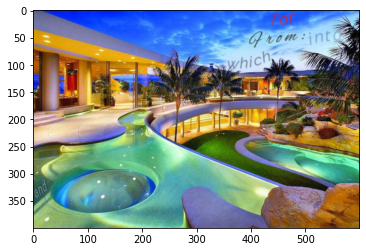

In [4]:
plt.imshow(img)

In [5]:
font, font.shape

(array([b'Open Sans', b'Open Sans', b'Open Sans', b'Roboto', b'Roboto',
        b'Roboto', b'Alex Brush', b'Alex Brush', b'Alex Brush',
        b'Alex Brush', b'Alex Brush', b'Open Sans', b'Open Sans',
        b'Open Sans', b'Open Sans', b'Raleway', b'Raleway', b'Raleway',
        b'Raleway', b'Raleway'], dtype='|S10'),
 (20,))

In [6]:
txt, txt.shape, sum([len(x) for x in txt])

(array([b'for', b'and', b'From:', b'into', b'which'], dtype='|S5'), (5,), 20)

In [7]:
len(txt)

5

In [8]:
charBB[0][0][0], charBB.shape

(436.0432078812741, (2, 4, 20))

In [9]:
wordBB.shape

(2, 4, 5)

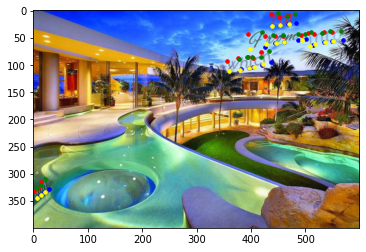

In [10]:
fig, ax = plt.subplots()
ax.imshow(img)

plt.scatter(charBB[0,0,:], charBB[1,0,:], marker=".", color="red", s=50)
plt.scatter(charBB[0,1,:], charBB[1,1,:], marker=".", color="green", s=50)
plt.scatter(charBB[0,2,:], charBB[1,2,:], marker=".", color="blue", s=50)
plt.scatter(charBB[0,3,:], charBB[1,3,:], marker=".", color="yellow", s=50)

plt.show()

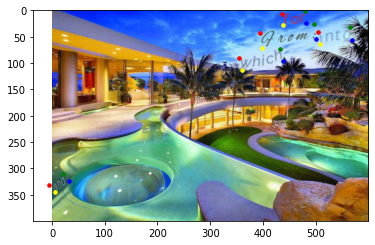

In [11]:
fig, ax = plt.subplots()
ax.imshow(img)

plt.scatter(wordBB[0,0,:], wordBB[1,0,:], marker=".", color="red", s=50)
plt.scatter(wordBB[0,1,:], wordBB[1,1,:], marker=".", color="green", s=50)
plt.scatter(wordBB[0,2,:], wordBB[1,2,:], marker=".", color="blue", s=50)
plt.scatter(wordBB[0,3,:], wordBB[1,3,:], marker=".", color="yellow", s=50)

plt.show()

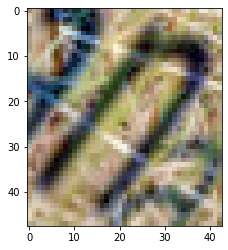

In [31]:
fig, ax = plt.subplots()

i=20
bb=charBB[:,:,i]

x=int(min(bb[0,:]))
y=int(min(bb[1,:]))
width=int(max(bb[0,:])-min(bb[0,:]))
height=int(max(bb[1,:])-min(bb[1,:]))

imgx=img[y:y+height,x:x+width,:]
ax.imshow(imgx)
    
plt.show()

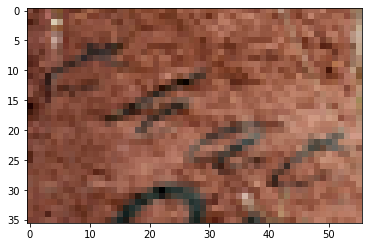

In [42]:
fig, ax = plt.subplots()

i=3
bb=wordBB[:,:,i]

x=int(min(bb[0,:]))
y=int(min(bb[1,:]))
width=int(max(bb[0,:])-min(bb[0,:]))
height=int(max(bb[1,:])-min(bb[1,:]))

imgx=img[y:y+height,x:x+width,:]
ax.imshow(imgx)
    
plt.show()

In [12]:
import cv2

In [13]:
src=np.dstack(charBB[:,:,i])[0]  # pairs of x,y

# If want to use real size:
# # All points are in format [cols, rows]
# pt_A = src[0]
# pt_B = src[1]
# pt_C = src[2]
# pt_D = src[3]

# # Here, I have used L2 norm. You can use L1 also.
# width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
# width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
# maxWidth = max(int(width_AD), int(width_BC))
 
# height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
# height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
# maxHeight = max(int(height_AB), int(height_CD))

# Use fixed size, previous values for real size
maxWidth=224
maxHeight=224

In [14]:
input_pts = np.float32(src)
# y comes first in the matrix
output_pts = np.float32([[0, 0],
                        [maxHeight - 1, 0],
                        [maxWidth - 1, maxHeight - 1],
                        [0, maxWidth - 1]])

In [15]:
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [16]:
out = cv2.warpPerspective(img,
                          M,
                          (maxWidth, maxHeight),
                          flags=cv2.INTER_LINEAR)

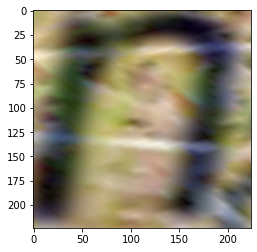

In [17]:
plt.imshow(out)

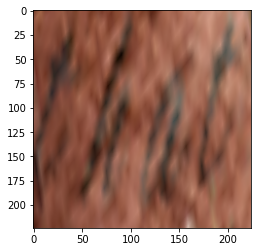

In [43]:
i=3
src=np.dstack(wordBB[:,:,i])[0]  # pairs of x,y
input_pts = np.float32(src)
# y comes first in the matrix
output_pts = np.float32([[0, 0],
                        [maxHeight - 1, 0],
                        [maxWidth - 1, maxHeight - 1],
                        [0, maxWidth - 1]])
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
out = cv2.warpPerspective(img,
                          M,
                          (maxWidth, maxHeight),
                          flags=cv2.INTER_LINEAR)
plt.imshow(out)

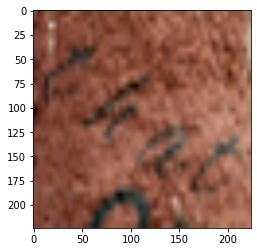

In [44]:
plt.imshow(cv2.resize(imgx, (maxWidth, maxHeight)))

In [18]:
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [19]:
def crop_wrap_letter(img, bounding_box):
    src=bounding_box
    maxWidth=224
    maxHeight=224
    input_pts = np.float32(src)
    # y comes first in the matrix
    output_pts = np.float32([[0, 0],
                            [maxHeight - 1, 0],
                            [maxHeight - 1, maxWidth - 1],
                            [0, maxWidth - 1]])
    # Compute the perspective transform M
    M = cv2.getPerspectiveTransform(input_pts,output_pts)
    out = cv2.warpPerspective(img,
                          M,
                          (maxWidth, maxHeight),
                          flags=cv2.INTER_LINEAR)
    return out

In [20]:
def crop_wrap_image(img, charBB, font):
    image_letters = []
    for i in range(font.shape[0]):
        bounding_box = np.dstack(charBB[:,:,i])[0]  # pairs of x,y
        letter_img = crop_wrap_letter(img, bounding_box)
        image_letters.append([letter_img, font[i]])
    return image_letters

In [21]:
def crop_wrap_data(db):
    data_letters = []
    for im in im_names:
        img = db['data'][im][:]
        font = db['data'][im].attrs['font']
        txt = db['data'][im].attrs['txt']
        charBB = db['data'][im].attrs['charBB']
        wordBB = db['data'][im].attrs['wordBB']
        data_letters.extend(crop_wrap_image(img, charBB, font))
    return data_letters

In [22]:
def load_db():
    db = h5py.File('SynthText.h5', 'r')
    im_names = list(db['data'].keys())
    return db, im_names

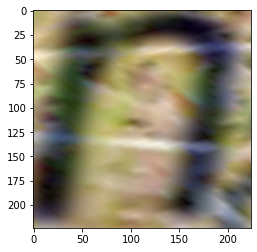

In [23]:
limg = crop_wrap_letter(img, np.dstack(charBB[:,:,i])[0])
plt.imshow(limg)

In [24]:
import tensorflow as tf

In [25]:
data = crop_wrap_data(db)

In [26]:
index = 0

In [ ]:
for i, ximg in enumerate(data):
    if i==10:
        break
    index+=1
    plt.figure()
    plt.imshow(tf.keras.applications.resnet50.preprocess_input(ximg))

TypeError: list indices must be integers or slices, not tuple

<Figure size 432x288 with 0 Axes>